# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 09 ноября 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***

Выберем случайно $ \{j_{1},\, j_{2},\, ...,\, j_{n}\} $, начальный шаг $ \alpha_{0} $, начальное приближение $ w_{0} $, размер батча *n*
$$ Q_{r}(w) = Q(w) + \frac{1}{C} R(w) $$
$$ Q(w) = \frac{1}{n}\sum_{i=1}^{n}L(w, x_{j_{i}}, y_{j_{i}}) $$
$$ Q^*(w_{old}) = \frac{1}{n}\sum_{i=1}^{n}L(w_{old}, x_{j_{i}}, y_{j_{i}}) $$
$$ L(w, x_{j}, y_{j}) = (\langle x_j,w\rangle - y_j)^2 $$
$$ Q_{r}(w) = \frac{1}{n}\sum_{i=1}^{n}(\langle\,x_{j_{i}},w\rangle - y_{j_{i}})^2 + \frac{1}{C}R(w) $$
$$R(w) =  \sum_{i=1}^{D}w_i^2$$
$$ \alpha = f(k),\;\; k = k+1 $$

$$ w_{new} = w_{old} - \alpha\nabla_{w}Q^*(w_{old}) - \alpha\nabla_{w}R(w_{old}) $$
$$ w_{new} = (1 - \frac{2\alpha}{C})w_{old} - \frac{2\alpha}{n}\sum_{i=1}^{n}(\langle x_{j_{i}},w_{old}\rangle - y_{j_{i}})x_{j_{i}} $$

Интуитивно градиент равен сумме неправильно классифицированных объектов.

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***

Выберем случайно $ \{j_{1},\, j_{2},\, ...,\, j_{n}\} $, начальный шаг $ \alpha_{0} $, начальное приближение $ w_{0} $, размер батча *n*
$$ Q_{r}(w) = Q(w) + \frac{1}{C} R(w) $$
$$ Q(w) = -\frac{1}{n}\sum_{i=1}^{n}L(w, x_{j_{i}}, y_{j_{i}}) $$
$$ L(w, x_{j}, y_{j}) = y_j \log a_j + ( 1 - y_j) \log (1 - a_j) $$
$$ Q^`(w) = -\frac{1}{n}\sum_{i=1}^{n}(y_{j_{i}}log(a_{j_{i}}) + (1 - y_{j_{i}})log(1 - a_{j_{i}})) + \frac{1}{C} R(w) $$
$$R(w) =  \sum_{i=1}^{D}w_i^2$$
$$ a_{j_{i}} = \sigma( \langle\,x_{j_{i}},w\rangle ) $$
$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$
$$ \nabla_{w}Q^`(w) = -\frac{1}{n}\sum_{i=1}^{n}(y_{j_{i}} - a_{j_{i}})x_{j_{i}} + \frac{2}{C}w $$
$$ \alpha = f(k),\;\; k = k+1 $$

$$ w_{new} = w_{old} +\frac{1}{n}\alpha\sum_{i=1}^{n}x_{j_{i}}(y_{j_{i}} - a_{j_{i}}) - \alpha \frac{2}{C}w_{old} $$
$$ w_{new} = (1 - \frac{2\alpha}{C})w_{old} + \frac{1}{n}\alpha\sum_{i=1}^{n}(y_{j_{i}} - a_{j_{i}})x_{j_{i}} $$

Интуитивно градиент равен количеству неправильно классифицированных объектов. От градиента в линейной регрессии отличается использованием сигмоиды, что переводит понятие правильной классификации в термины вероятностей.

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

1)

$$\nabla_{w} Q(w) = \frac{1}{N}(2X^TXw - 2X^TY) $$
$$\nabla_{w}^2Q(w) = \frac{2}{N}X^TX $$

Так как матрица X имеет строк не меньше, чем столбцов, и имеет полный ранг, то 
$ Xv \neq 0 \;, \;$ если$\;\; v \neq 0$
$$ Xv = u $$
$$(X^TXv, v) = v^TX^TXv = (Xv)^TXv = u^Tu = \sum_{j}u_{j}^2 \; > 0 $$
Таким образом, гессиан положительно определен, а $w$ - точка минимума.

2)

$$ Q_{r}(w) = Q(w) + \alpha R(w) $$
$$\nabla_{w} Q_{r}(w) = \nabla_{w} Q(w) + \nabla_{w} (\alpha R(w)) $$
$$\nabla_{w} Q_{r}(w) = (2X^TXw - 2X^TY) + 2\alpha w = 0 $$
$$ (X^TX + \alpha E)w = X^TY $$
$$ w = (X^TX + \alpha E)^{-1} X^TY $$

Если матрица Х имеет линейно зависимые признаки, то матрица $XX^T$ может быть необратимой. В таком случае регуляризация помогает сделать эту матрицу обратимой.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***

 Пусть $p(y_i = 1 | x_i) = p , а p(y_i = 0 | x_i) = 1 - p$ . Тогда :
 
$$ E(L|x_i) = -p * log(a(x_i)) - (1 - p) * log(1 - a(x_i)) $$
$$ E'(L|x_i) = -\frac{p}{a(x_i)} + \frac{1 - p}{1 - a(x_i)} = \frac{a(x_i) - p}{a(x_i)*(1 - a(x_i))} $$
$ E'(L|x_i) = 0$, при $a(x_i) = p = p(y_i = 1 | x_i)$ ; $ < 0$ при $a(x_i) < p$ ; $ > 0$ при $ a > p$

Таким образом $ a(x_i) = p(y_i = 1| x_i)$ -- точка минимума $E(L|x_i)$.

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Нет, не нужно. $w_0$ -- это начальный сдвиг, который обозначает значение $y$ при $x = 0$, поэтому не должен учитываться в регуляризации(поскольку он константный и относится лишь к неизменяемому столбцу признаков).

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [41]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    
    indices = np.arange(len(y))
    if(shuffle):
        np.random.shuffle(indices)
    batch = []
    for i in indices:
        batch.append(i)
        if(len(batch) == batch_size):
            X_batch = X[batch]
            y_batch = y[batch]
            yield (X_batch, y_batch)
            batch = []

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [42]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """

    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x

from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):


    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', batch_size=1):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """

        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter': [], 'loss': []}
        self.model_type = model_type
        self.batch_size = batch_size

    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        reg = np.dot(self.weights[1:], self.weights[1:]) / self.C
        n = X_batch.shape[0]
        scalar = np.dot(X_batch, self.weights)
        if(self.model_type == 'lin_reg'):
            loss = (1 / n) * np.sum(np.power(y_batch - scalar, 2)) + reg
        elif(self.model_type == 'log_reg'):
            pred = sigmoid(scalar)
            loss = (np.sum(y_batch * np.log2(pred) + (1 - y_batch) * np.log2(1 - pred)) / (-n)) + reg
        return loss

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        reg_grad = (2 * np.array([0, *self.weights[1:]])) / self.C
        scalar = np.dot(X_batch, self.weights)
        n = y_batch.shape[0]
        loss_grad = 0
        if(self.model_type == 'lin_reg'):
            loss_grad = 2 * (np.dot((scalar - y_batch), X_batch) / n) + reg_grad
            loss_grad = loss_grad
        elif(self.model_type == 'log_reg'):
            pred = sigmoid(scalar)
            loss_grad = (np.dot((y_batch - pred), X_batch) / (-n)) + reg_grad
        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - self.alpha * new_grad

    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''

        X = np.hstack((np.ones((X.shape[0], 1)), X))
        # Нужно инициализровать случайно веса
        self.weights = 0.5 * np.random.randn(X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, shuffle=True, batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
        return self

    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''

        X = np.hstack((np.ones((X.shape[0], 1)), X))
        if(self.model_type == 'lin_reg'):
            y_hat = np.dot(X, self.weights)
        elif(self.model_type == 'log_reg'):
            y_hat = sigmoid(np.dot(X, self.weights))
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot
        return y_hat


Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [4]:
def plot_decision_boundary(clf):
    weights = clf.weights
    x = np.linspace(-6, 8)
    y = ((-1)*(weights[1] * x + weights[0])) / weights[2]
    plt.plot(x, y, label='model = {}'.format(clf.model_type))

[-1.61248291  0.53578605 -0.28763406]


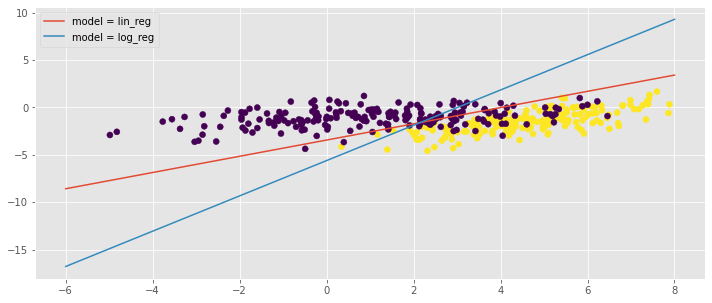

In [5]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

my_model = MySGDClassifier(batch_generator, C=200, alpha=0.03, max_epoch=30, model_type='lin_reg', batch_size=30)
my_model.fit(X,2 * y - 1)
#my_model.fit(X,y)
plot_decision_boundary(my_model)

my_model = MySGDClassifier(batch_generator, C=200, alpha=0.05, max_epoch=30, model_type='log_reg', batch_size=30)
my_model.fit(X,y)
plot_decision_boundary(my_model)

plt.scatter(X[:,0], X[:,1], c=y)
plt.legend()
plt.show()

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [5]:
from sklearn.datasets import make_classification

In [6]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

In [7]:
N = 100

In [8]:
%%time
alpha_loss_log = []
alpha_mas = np.linspace(0.01, 0.19, 5)
for i in alpha_mas:
    model = MySGDClassifier(batch_generator, C=200,alpha=i,max_epoch=20, model_type='lin_reg', batch_size=100)
    model.fit(X, y)
    loss = np.array(model.errors_log['loss'])
    mean = []
    for j in range(len(loss) // N):
        mean.append(np.mean(loss[j*N:(j+1)*N]))
    alpha_loss_log.append((mean, i))
    print(i)

0.01
0.055
0.09999999999999999
0.14500000000000002
0.19
Wall time: 7.67 s


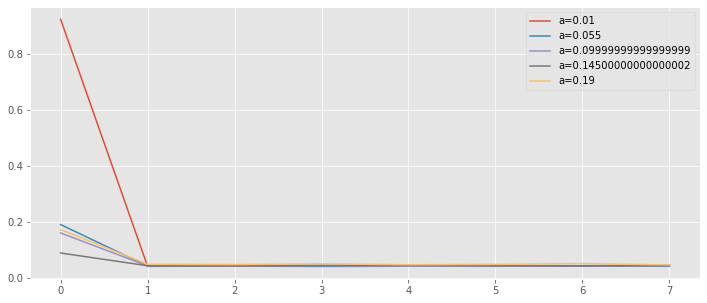

In [9]:
#fig = plt.figure(figsize=(15,8))
for i in alpha_loss_log:
    plt.plot(i[0][::25], label='a={}'.format(i[1]))
plt.legend()

In [10]:
alpha_loss_log = []
alpha_mas = np.linspace(0.01, 1, 5)
for i in alpha_mas:
    model = MySGDClassifier(batch_generator, C=200,alpha=i,max_epoch=20, model_type='log_reg', batch_size=100)
    model.fit(X, y)
    loss = np.array(model.errors_log['loss'])
    mean = []
    for j in range(len(loss) // N):
        mean.append(np.mean(loss[j*N:(j+1)*N]))
    alpha_loss_log.append((mean,i))
    print(i)

0.01
0.2575
0.505
0.7525
1.0


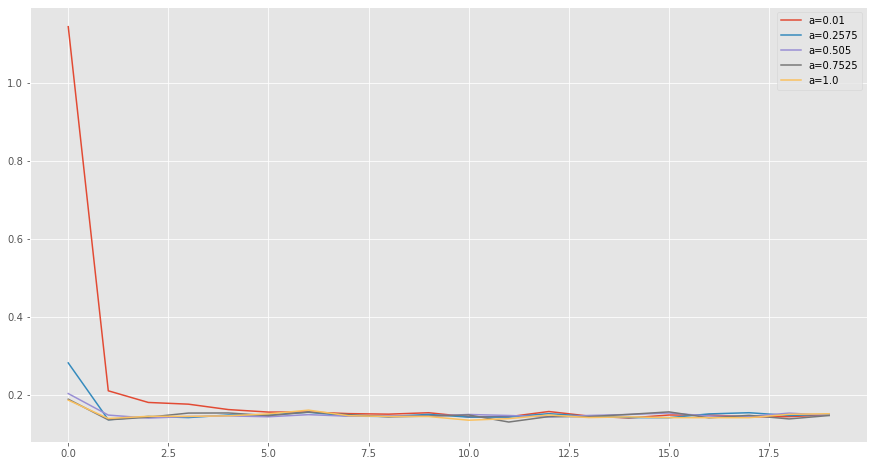

In [11]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()
for i in alpha_loss_log:
    ax.plot(i[0][::10],label='a={}'.format(i[1]))
plt.legend()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

*Лучше выбирать alpha где-то около 0.2*
*Т.к. при слишком больших alpha(в районе 1) слишком болшие потери, а при слишком маленьких alpha(в районе 0.01) нужно слишком много эпох для сходимости*

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [12]:
reg_coef = np.logspace(3, -3, 10)

In [13]:
%%time
weights_lin = []
weights_log = []
for coef in reg_coef:
    my_model = MySGDClassifier(batch_generator, C=coef, alpha=0.1, max_epoch=100, model_type='lin_reg',batch_size=1000)
    my_model.fit(X,y)
    weights_lin.append(np.mean(my_model.weights))
    my_model = MySGDClassifier(batch_generator, C=coef, alpha=0.1, max_epoch=100, model_type='log_reg',batch_size=1000)
    my_model.fit(X,y)
    weights_log.append(np.mean(my_model.weights))

C:\Users\artemii\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-3-eede3a720d6c>:45: RuntimeWarning: overflow encountered in power
  loss = (1 / n) * np.sum(np.power(y_batch - scalar, 2)) + reg
<ipython-input-3-eede3a720d6c>:41: RuntimeWarning: overflow encountered in double_scalars
  reg = np.dot(self.weights[1:], self.weights[1:]) / self.C
<ipython-input-3-eede3a720d6c>:48: RuntimeWarning: divide by zero encountered in log2
  loss = (np.sum(y_batch * np.log2(pred) + (1 - y_batch) * np.log2(1 - pred)) / (-n)) + reg
<ipython-input-3-eede3a720d6c>:48: RuntimeWarning: invalid value encountered in multiply
  loss = (np.sum(y_batch * np.log2(pred) + (1 - y_batch) * np.log2(1 - pred)) / (-n)) + reg
<ipython-input-3-eede3a720d6c>:10: RuntimeWarning: overflow encountered in exp
  sigm_value_x = 1 / (1 + np.exp(-x))
<ipython-input-3-eede3a720d6c>:58: RuntimeWarning

Wall time: 1min 46s


In [14]:
weights_lin

[0.03447797261842061,
 0.033980545772552585,
 0.03463439497822981,
 0.03583700294471856,
 0.03707432712999426,
 0.04086312833690475,
 nan,
 nan,
 nan,
 nan]

In [15]:
weights_log

[-0.04515663051409674,
 -0.03122975603257128,
 -0.02637498904778414,
 -0.024586575097435736,
 -0.01898797673084847,
 -0.007328577487381715,
 50.75974472524156,
 nan,
 nan,
 nan]

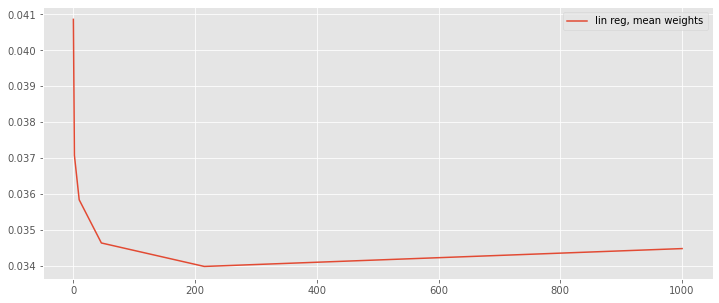

In [16]:
plt.plot(reg_coef[:-4], np.array(weights_lin)[:-4], label='lin reg, mean weights')
plt.legend()
plt.show()

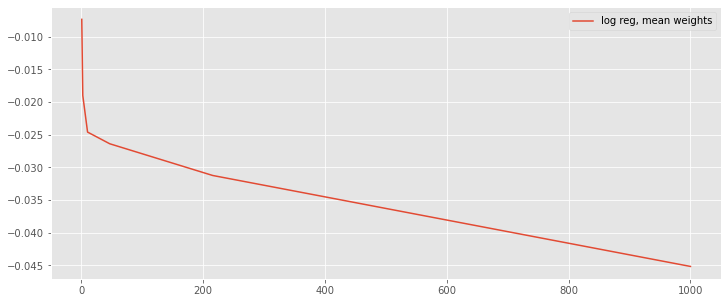

In [17]:
plt.plot(reg_coef[:-4], np.array(weights_log)[:-4], label='log reg, mean weights')
plt.legend()
plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [43]:
doc_to_title = {}
with open('docs_titles.tsv', encoding='utf-8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [44]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [45]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [46]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [47]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group_t = new_doc['group_id']
    doc_id_t = new_doc['doc_id']
    title_t = doc_to_title[doc_id_t]
    if doc_group_t not in testgroups_titledata:
        testgroups_titledata[doc_group_t] = []
    testgroups_titledata[doc_group_t].append((doc_id_t, title_t))

In [48]:
import numpy as np
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [49]:
#batch_size = 200

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [50]:
def splitt(data, n=10, shuffle=True):
    cv = KFold(n_splits=n, shuffle=shuffle)
    for train_ind, test_ind in cv.split(range(1,130)):
        ind_train = []
        ind_test = []
        for j in train_ind:
            for i in enumerate(data):
                if(j == i[1]):
                    ind_train.append(i[0])
        for j in test_ind:
            for i in enumerate(data):
                if(j == i[1]):
                    ind_test.append(i[0])
        yield np.asarray(ind_train), np.asarray(ind_test)

In [62]:
def cv_score(data, groups, border, params):
    result = []
    score = []
    for train_ind, test_ind in splitt(groups):
        C, alpha, max_epoch, model_type = params
        clf = MySGDClassifier(batch_generator, C=C, alpha=alpha, batch_size=200, max_epoch=max_epoch, model_type=model_type)
        X_train, X_test = data[0][train_ind], data[0][test_ind]
        y_train, y_test = data[1][train_ind], data[1][test_ind]
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        pred = np.asarray([1 if i > border else 0 for i in pred])
        score.append(f1_score(pred, y_test))
    result.append(np.asarray(score).mean())
    return result

In [52]:
my_scale = StandardScaler()

In [53]:
X_train = my_scale.fit_transform(X_train)
X_test = my_scale.transform(X_test)

In [54]:
dictionary = {'C' : [i * 200 for i in range(1, 11, 2)], 'alpha': [0.001, 0.01, 0.1, 0.05, 0.005, 0.03],
              'max_epoch': [10, 20, 30 ,40, 50]}

In [56]:
%%time
best_score = 0
test_params = np.empty((5, 6, 5, 2))
for j, C in enumerate(dictionary['C']):
    for k , alpha in enumerate(dictionary['alpha']):
        for l, max_epoch in enumerate(dictionary['max_epoch']):
            model_type = 'log_reg'
            params = [C, alpha, max_epoch, model_type]
            ress = cv_score((X_train, y_train), groups_train, params)
            test_params[j][k][l][0] = ress[0]
            print(params)
            model_type = 'lin_reg'
            params = [C, alpha, max_epoch, model_type]
            ress = cv_score((X_train, y_train), groups_train, params)
            test_params[j][k][l][1] = ress[0]
            print(params)

[200, 0.001, 10, 'log_reg']
[200, 0.001, 10, 'lin_reg']
[200, 0.001, 20, 'log_reg']
[200, 0.001, 20, 'lin_reg']
[200, 0.001, 30, 'log_reg']
[200, 0.001, 30, 'lin_reg']
[200, 0.001, 40, 'log_reg']
[200, 0.001, 40, 'lin_reg']
[200, 0.001, 50, 'log_reg']
[200, 0.001, 50, 'lin_reg']
[200, 0.01, 10, 'log_reg']
[200, 0.01, 10, 'lin_reg']
[200, 0.01, 20, 'log_reg']
[200, 0.01, 20, 'lin_reg']
[200, 0.01, 30, 'log_reg']
[200, 0.01, 30, 'lin_reg']
[200, 0.01, 40, 'log_reg']
[200, 0.01, 40, 'lin_reg']
[200, 0.01, 50, 'log_reg']
[200, 0.01, 50, 'lin_reg']
[200, 0.1, 10, 'log_reg']
[200, 0.1, 10, 'lin_reg']
[200, 0.1, 20, 'log_reg']


C:\Users\artemii\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-42-eede3a720d6c>:45: RuntimeWarning: overflow encountered in power
  loss = (1 / n) * np.sum(np.power(y_batch - scalar, 2)) + reg


[200, 0.1, 20, 'lin_reg']
[200, 0.1, 30, 'log_reg']
[200, 0.1, 30, 'lin_reg']
[200, 0.1, 40, 'log_reg']


<ipython-input-42-eede3a720d6c>:75: RuntimeWarning: invalid value encountered in subtract
  self.weights = self.weights - self.alpha * new_grad


[200, 0.1, 40, 'lin_reg']
[200, 0.1, 50, 'log_reg']
[200, 0.1, 50, 'lin_reg']
[200, 0.05, 10, 'log_reg']
[200, 0.05, 10, 'lin_reg']
[200, 0.05, 20, 'log_reg']
[200, 0.05, 20, 'lin_reg']
[200, 0.05, 30, 'log_reg']
[200, 0.05, 30, 'lin_reg']
[200, 0.05, 40, 'log_reg']
[200, 0.05, 40, 'lin_reg']
[200, 0.05, 50, 'log_reg']
[200, 0.05, 50, 'lin_reg']
[200, 0.005, 10, 'log_reg']
[200, 0.005, 10, 'lin_reg']
[200, 0.005, 20, 'log_reg']
[200, 0.005, 20, 'lin_reg']
[200, 0.005, 30, 'log_reg']
[200, 0.005, 30, 'lin_reg']
[200, 0.005, 40, 'log_reg']
[200, 0.005, 40, 'lin_reg']
[200, 0.005, 50, 'log_reg']
[200, 0.005, 50, 'lin_reg']
[200, 0.03, 10, 'log_reg']
[200, 0.03, 10, 'lin_reg']
[200, 0.03, 20, 'log_reg']
[200, 0.03, 20, 'lin_reg']
[200, 0.03, 30, 'log_reg']
[200, 0.03, 30, 'lin_reg']
[200, 0.03, 40, 'log_reg']
[200, 0.03, 40, 'lin_reg']
[200, 0.03, 50, 'log_reg']
[200, 0.03, 50, 'lin_reg']
[600, 0.001, 10, 'log_reg']
[600, 0.001, 10, 'lin_reg']
[600, 0.001, 20, 'log_reg']
[600, 0.001, 20, '

In [57]:
par = np.asarray(test_params)

In [58]:
np.unravel_index(np.argmax(par), par.shape)

(2, 4, 1, 0)

In [60]:
(dictionary['C'][2], dictionary['alpha'][4], dictionary['max_epoch'][1], 'log_reg')

(1000, 0.005, 20, 'log_reg')

In [63]:
np.max(par)

0.5961701552874745

Лучшие параметры: C=1000 , alpha = 0.005 , max_epoch = 20 , model_type = 'log_reg', batch_size = 200

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [67]:
bord_list = [i * 0.05 for i in range(1, 21)]

In [68]:
bord_res = []
best_params = [1000, 0.005, 20, 'log_reg']
for j in bord_list:
    cur_res = cv_score((X_train, y_train), groups_train, j, best_params)
    bord_res.append(cur_res)
    print(j)

0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.65
0.7000000000000001
0.75
0.8
0.8500000000000001
0.9
0.9500000000000001
1.0


In [75]:
bord_res = np.asarray(bord_res)
bord_list = np.asarray(bord_list)
bord_list[np.unravel_index(np.argmax(bord_res), bord_res.shape)]

0.4

Лучшая граница : 0.4

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

In [76]:
final_model = MySGDClassifier(batch_generator, C=1000, alpha=0.005, batch_size=200, max_epoch=20, model_type='log_reg')

In [77]:
final_model.fit(X_train, y_train)

MySGDClassifier(C=1000, alpha=0.005,
                batch_generator=<function batch_generator at 0x00000141FB33FDC0>,
                batch_size=200, max_epoch=20, model_type='log_reg')

In [78]:
final_result = final_model.predict(X_test)

In [79]:
final_result = np.asarray([1 if i > 0.4 else 0 for i in final_result])

In [80]:
pair_ids = np.asarray([test_data.iloc[i]['pair_id'] for i in range(len(final_result))])

In [81]:
pd_res = pd.DataFrame({'pair_id': pair_ids, 'target': final_result})

In [82]:
pd_res

,pair_id,target
0,11691,0
1,11692,0
2,11693,1
3,11694,1
4,11695,1
...,...,...
16622,28313,0
16623,28314,0
16624,28315,1
16625,28316,1


In [83]:
pd_res.to_csv('my_prediction.csv', index=False)

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

https://www.kaggle.com/artemygolikov Artemy Golikov

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***

Хотелось бы больше информации об эффективном подборе параметров, больше практики (например как на лекции по svm), также побольше бы рассказать про регуляризации.